In [5]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import numpy as np

In [31]:
SPY = pd.read_csv("SPY.csv", index_col="Date")
SPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-15,196.470001,196.649994,194.309998,195.720001,163.820328,139951000
2014-08-18,196.800003,197.449997,196.690002,197.360001,165.192993,75424000
2014-08-19,197.839996,198.539993,197.440002,198.389999,166.055115,59135000
2014-08-20,198.119995,199.160004,198.080002,198.919998,166.498749,72763000
2014-08-21,199.089996,199.759995,198.929993,199.500000,166.984268,67791000
...,...,...,...,...,...,...
2024-08-08,523.909973,531.289978,521.840027,530.650024,530.650024,63276600
2024-08-09,529.809998,534.510010,528.559998,532.989990,532.989990,45619600
2024-08-12,534.210022,535.729980,530.950012,533.270020,533.270020,42542100


In [33]:
SPY.apply(pd.isnull).sum()/SPY.shape[0]

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [35]:
SPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-15,196.470001,196.649994,194.309998,195.720001,163.820328,139951000
2014-08-18,196.800003,197.449997,196.690002,197.360001,165.192993,75424000
2014-08-19,197.839996,198.539993,197.440002,198.389999,166.055115,59135000
2014-08-20,198.119995,199.160004,198.080002,198.919998,166.498749,72763000
2014-08-21,199.089996,199.759995,198.929993,199.500000,166.984268,67791000
...,...,...,...,...,...,...
2024-08-08,523.909973,531.289978,521.840027,530.650024,530.650024,63276600
2024-08-09,529.809998,534.510010,528.559998,532.989990,532.989990,45619600
2024-08-12,534.210022,535.729980,530.950012,533.270020,533.270020,42542100


<Axes: xlabel='Date'>

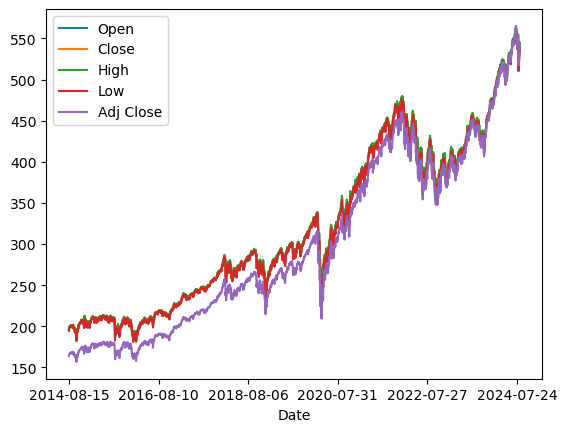

In [41]:
SPY[["Open", "Close","High","Low","Adj Close"]].plot()

In [43]:
SPY['target'] = SPY.shift(-1)['Close']

In [45]:
SPY

,Open,High,Low,Close,Adj Close,Volume,target
Date,,,,,,,
2014-08-15,196.470001,196.649994,194.309998,195.720001,163.820328,139951000,197.360001
2014-08-18,196.800003,197.449997,196.690002,197.360001,165.192993,75424000,198.389999
2014-08-19,197.839996,198.539993,197.440002,198.389999,166.055115,59135000,198.919998
2014-08-20,198.119995,199.160004,198.080002,198.919998,166.498749,72763000,199.500000
2014-08-21,199.089996,199.759995,198.929993,199.500000,166.984268,67791000,199.190002
...,...,...,...,...,...,...,...
2024-08-08,523.909973,531.289978,521.840027,530.650024,530.650024,63276600,532.989990
2024-08-09,529.809998,534.510010,528.559998,532.989990,532.989990,45619600,533.270020
2024-08-12,534.210022,535.729980,530.950012,533.270020,533.270020,42542100,542.039978


In [47]:
SPY = SPY.iloc[:-1,:].copy()

In [49]:
SPY

,Open,High,Low,Close,Adj Close,Volume,target
Date,,,,,,,
2014-08-15,196.470001,196.649994,194.309998,195.720001,163.820328,139951000,197.360001
2014-08-18,196.800003,197.449997,196.690002,197.360001,165.192993,75424000,198.389999
2014-08-19,197.839996,198.539993,197.440002,198.389999,166.055115,59135000,198.919998
2014-08-20,198.119995,199.160004,198.080002,198.919998,166.498749,72763000,199.500000
2014-08-21,199.089996,199.759995,198.929993,199.500000,166.984268,67791000,199.190002
...,...,...,...,...,...,...,...
2024-08-07,528.469971,531.590027,518.049988,518.659973,518.659973,70698300,530.650024
2024-08-08,523.909973,531.289978,521.840027,530.650024,530.650024,63276600,532.989990
2024-08-09,529.809998,534.510010,528.559998,532.989990,532.989990,45619600,533.270020


In [53]:
reg = Ridge(alpha=.1)
predictors = ['Open', 'Close', 'High','Low','Adj Close']

In [55]:
train = SPY.loc[:'2022-08-15']
test = SPY.loc['2022-08-16':]

In [57]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [59]:
predictions = reg.predict(test[predictors])

In [61]:
mean_absolute_error(test['target'], predictions)

3.411608655109732

In [65]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'predictions']
combined

,actual,predictions
Date,,
2022-08-16,426.649994,430.658781
2022-08-17,427.890015,427.798963
2022-08-18,422.140015,428.452745
2022-08-19,413.350006,422.915163
2022-08-22,412.350006,414.165390
...,...,...
2024-08-07,530.650024,521.239859
2024-08-08,532.989990,531.226986
2024-08-09,533.270020,534.551325


In [69]:
combined.plot

In [73]:
reg.coef_

array([-0.26744267,  0.48058569,  0.25388685,  0.39442644,  0.13232884])

In [75]:
def create_predictions(predictors, SPY, reg):
    train = SPY.loc[:'2022-08-15']
    test = SPY.loc['2022-08-16':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    return error, combined

In [85]:
SPY['month_close_avg'] = SPY['Close'].rolling(30).mean()
SPY['month_day_close'] = SPY['month_close_avg'] / SPY['Close']
SPY['close_open'] = SPY['Close'] / SPY['Open']
SPY

,Open,High,Low,Close,Adj Close,Volume,target,month_close_avg,month_day_close,close_open
Date,,,,,,,,,,
2014-08-15,196.470001,196.649994,194.309998,195.720001,163.820328,139951000,197.360001,NaN,NaN,0.996183
2014-08-18,196.800003,197.449997,196.690002,197.360001,165.192993,75424000,198.389999,NaN,NaN,1.002846
2014-08-19,197.839996,198.539993,197.440002,198.389999,166.055115,59135000,198.919998,NaN,NaN,1.002780
2014-08-20,198.119995,199.160004,198.080002,198.919998,166.498749,72763000,199.500000,NaN,NaN,1.004038
2014-08-21,199.089996,199.759995,198.929993,199.500000,166.984268,67791000,199.190002,NaN,NaN,1.002059
...,...,...,...,...,...,...,...,...,...,...
2024-08-07,528.469971,531.590027,518.049988,518.659973,518.659973,70698300,530.650024,547.153336,1.054936,0.981437
2024-08-08,523.909973,531.289978,521.840027,530.650024,530.650024,63276600,532.989990,546.658004,1.030167,1.012865
2024-08-09,529.809998,534.510010,528.559998,532.989990,532.989990,45619600,533.270020,546.212003,1.024807,1.006002


In [89]:
SPY = SPY.iloc[30:,:].copy()

In [91]:
SPY

,Open,High,Low,Close,Adj Close,Volume,target,month_close_avg,month_day_close,close_open
Date,,,,,,,,,,
2014-09-29,196.199997,197.889999,196.050003,197.539993,166.116531,95112000,197.020004,199.602000,1.010438,1.006830
2014-09-30,197.690002,198.300003,196.610001,197.020004,165.679306,131302000,194.350006,199.590667,1.013048,0.996611
2014-10-01,196.699997,196.770004,193.910004,194.350006,163.433975,177798000,194.380005,199.456000,1.026272,0.988053
2014-10-02,194.179993,195.059998,192.350006,194.380005,163.459244,157285000,196.520004,199.304667,1.025335,1.001030
2014-10-03,195.679993,196.940002,195.080002,196.520004,165.258835,121569000,196.289993,199.205334,1.013664,1.004293
...,...,...,...,...,...,...,...,...,...,...
2024-08-07,528.469971,531.590027,518.049988,518.659973,518.659973,70698300,530.650024,547.153336,1.054936,0.981437
2024-08-08,523.909973,531.289978,521.840027,530.650024,530.650024,63276600,532.989990,546.658004,1.030167,1.012865
2024-08-09,529.809998,534.510010,528.559998,532.989990,532.989990,45619600,533.270020,546.212003,1.024807,1.006002


In [93]:
predictors = ['Open', 'Close', 'High','Low','Adj Close','close_open','month_close_avg','month_day_close']

In [99]:
SPY[pd.isnull(SPY)]

,Open,High,Low,Close,Adj Close,Volume,target,month_close_avg,month_day_close,close_open
Date,,,,,,,,,,
2014-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
SPY.apply(pd.isnull).sum()/SPY.shape[0]

Open               0.0
High               0.0
Low                0.0
Close              0.0
Adj Close          0.0
Volume             0.0
target             0.0
month_close_avg    0.0
month_day_close    0.0
close_open         0.0
dtype: float64

In [107]:
error, combined = create_predictions(predictors, SPY, reg)

In [109]:
num_inf_values = SPY['close_open'].isin([np.inf, -np.inf]).sum().sum()

print("Number of infinity values in the DataFrame:", num_inf_values)

Number of infinity values in the DataFrame: 0


In [111]:
print(error,'%') #it went up?

3.4250065867531987 %


<Axes: xlabel='Date'>

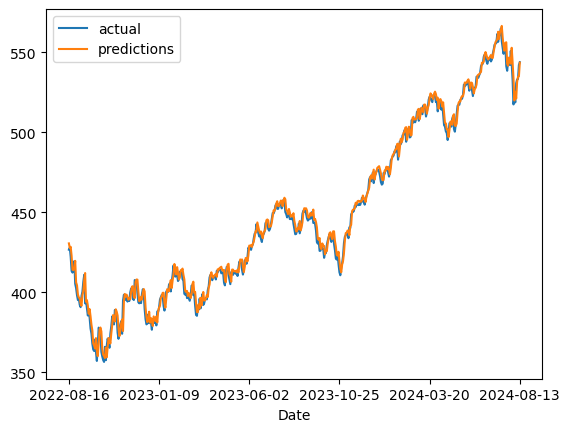

In [113]:
combined.plot()

In [122]:
error, combined = create_predictions(predictors, SPY, reg)
error

3.4250065867531987

In [124]:
predictors

['Open',
 'Close',
 'High',
 'Low',
 'Adj Close',
 'close_open',
 'month_close_avg',
 'month_day_close']

In [129]:
reg.coef_

array([-0.28392169,  0.51816918,  0.22482012,  0.4099428 ,  0.1333275 ,
       -6.33896017, -0.0081374 ,  5.22170346])

In [131]:
SPY.corr()['target']

Open               0.998976
High               0.999128
Low                0.999166
Close              0.999323
Adj Close          0.998740
Volume            -0.296886
target             1.000000
month_close_avg    0.994014
month_day_close   -0.113551
close_open         0.011488
Name: target, dtype: float64

In [161]:
combined['diff'] = (combined['actual'] - combined['predictions']).abs()

In [152]:
SPY

,Open,High,Low,Close,Adj Close,Volume,target,month_close_avg,month_day_close,close_open
Date,,,,,,,,,,
2014-09-29,196.199997,197.889999,196.050003,197.539993,166.116531,95112000,197.020004,199.602000,1.010438,1.006830
2014-09-30,197.690002,198.300003,196.610001,197.020004,165.679306,131302000,194.350006,199.590667,1.013048,0.996611
2014-10-01,196.699997,196.770004,193.910004,194.350006,163.433975,177798000,194.380005,199.456000,1.026272,0.988053
2014-10-02,194.179993,195.059998,192.350006,194.380005,163.459244,157285000,196.520004,199.304667,1.025335,1.001030
2014-10-03,195.679993,196.940002,195.080002,196.520004,165.258835,121569000,196.289993,199.205334,1.013664,1.004293
...,...,...,...,...,...,...,...,...,...,...
2024-08-07,528.469971,531.590027,518.049988,518.659973,518.659973,70698300,530.650024,547.153336,1.054936,0.981437
2024-08-08,523.909973,531.289978,521.840027,530.650024,530.650024,63276600,532.989990,546.658004,1.030167,1.012865
2024-08-09,529.809998,534.510010,528.559998,532.989990,532.989990,45619600,533.270020,546.212003,1.024807,1.006002


<Axes: xlabel='Date'>

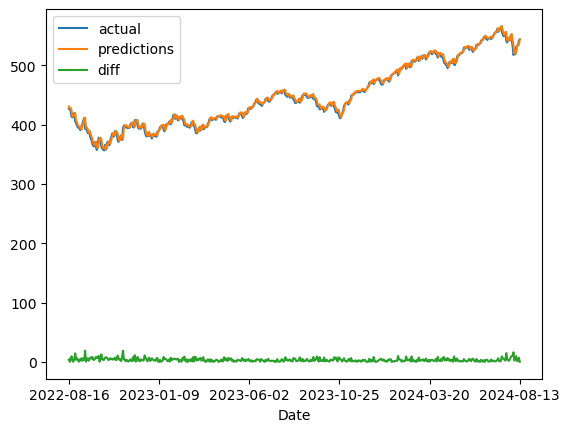

In [154]:
combined.plot()

In [157]:
mean_absolute_error(test['target'], predictions)

3.411608655109732

In [166]:
combined['Monthly_Change'] = combined.predictions.diff(periods=30)

<Axes: xlabel='Date'>

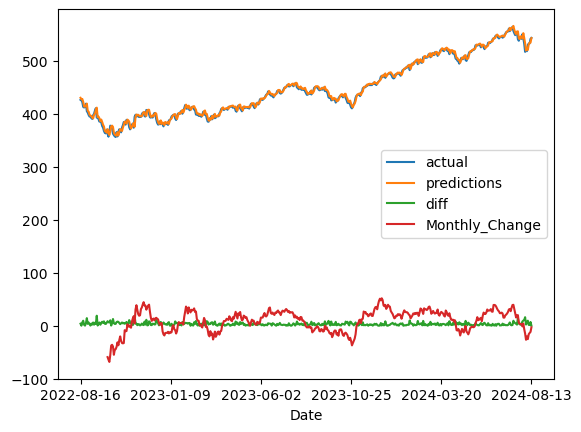

In [168]:
combined.plot()

In [170]:
combined['Monthly_Change']

Date
2022-08-16          NaN
2022-08-17          NaN
2022-08-18          NaN
2022-08-19          NaN
2022-08-22          NaN
                ...    
2024-08-07   -25.290360
2024-08-08   -16.009725
2024-08-09   -13.558003
2024-08-12   -11.548565
2024-08-13    -2.957138
Name: Monthly_Change, Length: 501, dtype: float64

In [174]:
combined[pd.isnull(combined)]

,actual,predictions,diff,Monthly_Change
Date,,,,
2022-08-16,NaN,NaN,NaN,NaN
2022-08-17,NaN,NaN,NaN,NaN
2022-08-18,NaN,NaN,NaN,NaN
2022-08-19,NaN,NaN,NaN,NaN
2022-08-22,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-08-07,NaN,NaN,NaN,NaN
2024-08-08,NaN,NaN,NaN,NaN
2024-08-09,NaN,NaN,NaN,NaN


In [176]:
combined = combined.iloc[30:,:].copy()

In [178]:
combined

,actual,predictions,diff,Monthly_Change
Date,,,,
2022-09-28,362.790009,371.419378,8.629369,-59.174605
2022-09-29,357.179993,363.639954,6.459961,-64.094129
2022-09-30,366.609985,360.151743,6.458242,-68.295734
2022-10-03,377.970001,367.613981,10.356020,-55.265765
2022-10-04,377.089996,376.732565,0.357431,-37.410647
...,...,...,...,...
2024-08-07,530.650024,521.062857,9.587167,-25.290360
2024-08-08,532.989990,531.330730,1.659260,-16.009725
2024-08-09,533.270020,534.677943,1.407923,-13.558003


<Axes: xlabel='Date'>

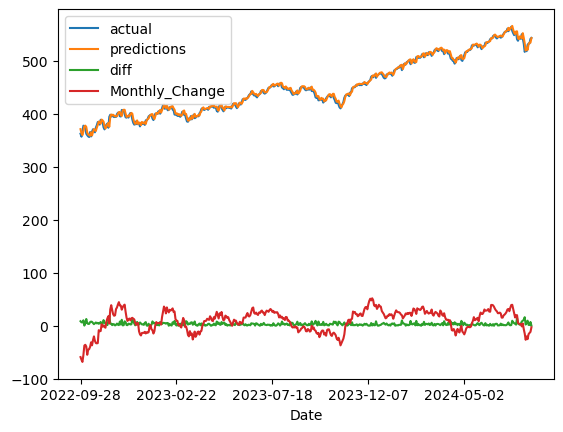

In [180]:
combined.plot()

<Axes: xlabel='Date'>

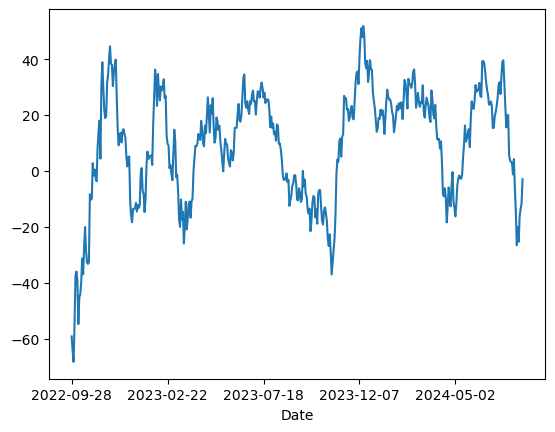

In [182]:
combined['Monthly_Change'].plot()

In [326]:
change_set = combined['Monthly_Change'][-30:]
change_set

Date
2024-07-02    19.619312
2024-07-03    21.095569
2024-07-05    23.152100
2024-07-08    26.054451
2024-07-09    30.792270
2024-07-10    31.727738
2024-07-11    27.521550
2024-07-12    34.137445
2024-07-15    39.201002
2024-07-16    39.611017
2024-07-17    31.485807
2024-07-18    24.109198
2024-07-19    15.625560
2024-07-22    19.946565
2024-07-23    20.011440
2024-07-24     5.639757
2024-07-25     3.772481
2024-07-26     3.210777
2024-07-29     3.060653
2024-07-30    -1.217906
2024-07-31     4.288846
2024-08-01    -6.253461
2024-08-02   -14.643470
2024-08-05   -26.531448
2024-08-06   -20.122286
2024-08-07   -25.290360
2024-08-08   -16.009725
2024-08-09   -13.558003
2024-08-12   -11.548565
2024-08-13    -2.957138
Name: Monthly_Change, dtype: float64

In [240]:
decision = np.mean(change_set)

In [359]:
#def Decision(x):
    #x = np.mean(x)
    #if x > 0:
        #return 1
    #else:
        #return 0

def last_30_mean(series):
    if len(series) >= 30:
        return series[-30:].mean()
    else:
        return None

combined['Last_30_Mean'] = combined['Monthly_Change'].rolling(window=90, min_periods=1).mean()
combined


,actual,predictions,diff,Monthly_Change,Decision,Last_30_Mean
Date,,,,,,
2022-09-28,362.790009,371.419378,8.629369,-59.174605,0,-59.174605
2022-09-29,357.179993,363.639954,6.459961,-64.094129,0,-61.634367
2022-09-30,366.609985,360.151743,6.458242,-68.295734,0,-63.854823
2022-10-03,377.970001,367.613981,10.356020,-55.265765,0,-61.707558
2022-10-04,377.089996,376.732565,0.357431,-37.410647,0,-56.848176
...,...,...,...,...,...,...
2024-08-07,530.650024,521.062857,9.587167,-25.290360,0,11.899852
2024-08-08,532.989990,531.330730,1.659260,-16.009725,0,11.495941
2024-08-09,533.270020,534.677943,1.407923,-13.558003,0,11.136292


<Axes: xlabel='Date'>

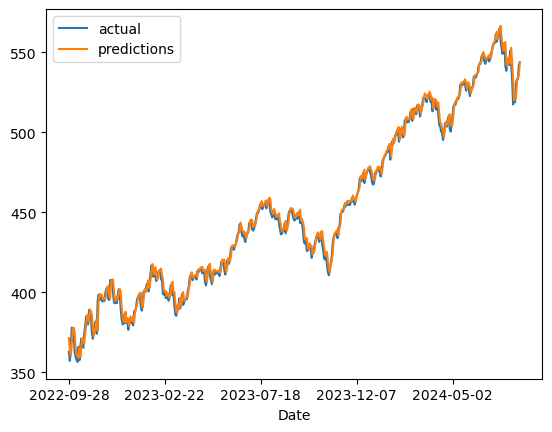

In [361]:
combined[["actual","predictions"]].plot()

<Axes: xlabel='Date'>

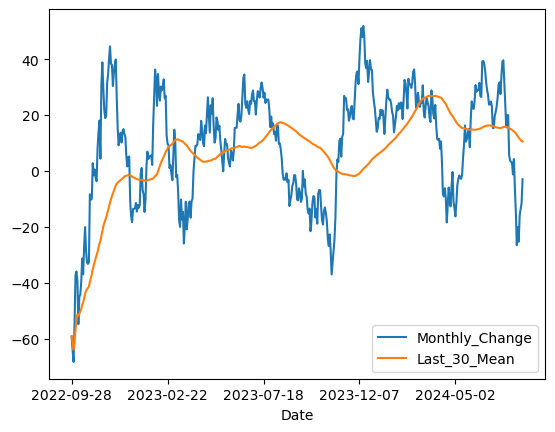

In [363]:
combined[["Monthly_Change","Last_30_Mean"]].plot()

In [294]:
combined

,actual,predictions,diff,Monthly_Change,Decision
Date,,,,,
2022-09-28,362.790009,371.419378,8.629369,-59.174605,0
2022-09-29,357.179993,363.639954,6.459961,-64.094129,0
2022-09-30,366.609985,360.151743,6.458242,-68.295734,0
2022-10-03,377.970001,367.613981,10.356020,-55.265765,0
2022-10-04,377.089996,376.732565,0.357431,-37.410647,0
...,...,...,...,...,...
2024-08-07,530.650024,521.062857,9.587167,-25.290360,0
2024-08-08,532.989990,531.330730,1.659260,-16.009725,0
2024-08-09,533.270020,534.677943,1.407923,-13.558003,0


<Axes: xlabel='Date'>

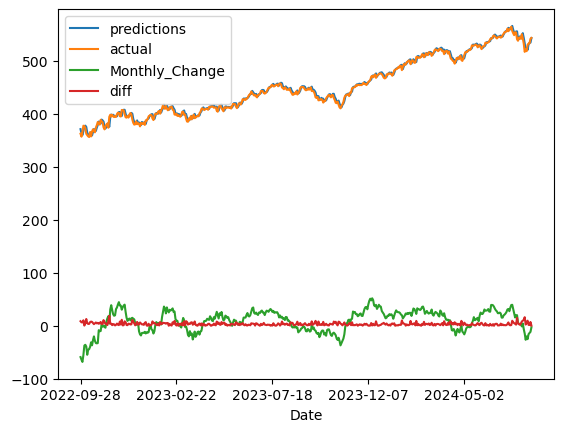

In [320]:
combined[["predictions","actual","Monthly_Change","diff"]].plot()

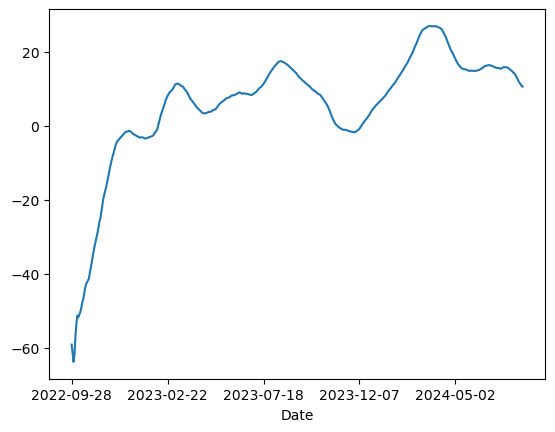

In [393]:
rolling_plot = combined["Last_30_Mean"].plot()

In [438]:
combined['Last_30_Mean'].head(50)

Date
2022-09-28   -59.174605
2022-09-29   -61.634367
2022-09-30   -63.854823
2022-10-03   -61.707558
2022-10-04   -56.848176
2022-10-05   -53.362712
2022-10-06   -51.340170
2022-10-07   -51.770341
2022-10-10   -51.028454
2022-10-11   -50.343529
2022-10-12   -49.373829
2022-10-13   -47.866625
2022-10-14   -47.025121
2022-10-17   -45.600028
2022-10-18   -43.897166
2022-10-19   -42.932100
2022-10-20   -42.330766
2022-10-21   -41.824477
2022-10-24   -41.341885
2022-10-25   -39.691453
2022-10-26   -38.290944
2022-10-27   -37.003174
2022-10-28   -35.271914
2022-10-31   -33.866091
2022-11-01   -32.490394
2022-11-02   -31.332740
2022-11-03   -30.307070
2022-11-04   -28.943097
2022-11-07   -27.465442
2022-11-08   -25.948277
2022-11-09   -24.968356
2022-11-10   -23.225160
2022-11-11   -21.342749
2022-11-14   -19.840419
2022-11-15   -18.649396
2022-11-16   -17.605508
2022-11-17   -16.594706
2022-11-18   -15.329738
2022-11-21   -14.050137
2022-11-22   -12.692116
2022-11-23   -11.294704
2022-11-25 